In [1]:
import yt as yt
from yt.units import Kelvin, gram, kboltz, erg, centimeter, second
import numpy as np

### CODATA RECOMMENDED VALUES OF THE FUNDAMENTAL PHYSICAL CONSTANTS: 2014
amu = 1.660539040*10**(-24)*gram # atomic mass unit to kilograms

parsec = 3.085678 * 10**(18) * centimeter # parsec to meters

electron_mass = 5.48579909070*10**(-4) * amu

### Specific units from c_emission.c

L_soblen = 100. * parsec # Not sure how this unit was derived

dust_cross_section = 2*10**(-21) * centimeter * centimeter # Not sure how this unit was derived

CII_abun = 3.31*10**(-4) # Not sure how this unit was derived


### All mass values come from the CRC Handbook of Chemistry and Physics May 2020


H_mass = 1.007825032*amu

H2_mass = 2.016*amu

He_mass = 4.002602*amu

### Conversions to YTEP-0003 compatible fields for use in Trident

# def _H_p0_density_YTEP_0003(field,data):
#     return data["HI density"].copy()
# yt.add_field(("gas", "H_p0_density"), function=_H_p0_density_YTEP_0003, units="g/cm**3",sampling_type="local")

# def _H_p1_density_YTEP_0003(field,data):
#     return data["HII density"].copy()
# yt.add_field(("gas", "H_p1_density"), function=_H_p1_density_YTEP_0003, units="g/cm**3",sampling_type="local")

# def _H2_p0_density_YTEP_0003(field,data):
#     return data["H2 density"].copy()
# yt.add_field(("gas", "H2_p0_density"), function=_H2_p0_density_YTEP_0003, units="g/cm**3",sampling_type="local")

# def _He_p0_density_YTEP_0003(field,data):
#     return data["HeI density"].copy()
# yt.add_field(("gas", "He_p0_density"), function=_He_p0_density_YTEP_0003, units="g/cm**3",sampling_type="local")

# def _He_p1_density_YTEP_0003(field,data):
#     return data["HeII density"].copy()
# yt.add_field(("gas", "He_p1_density"), function=_He_p1_density_YTEP_0003, units="g/cm**3",sampling_type="local")

# def _He_p2_density_YTEP_0003(field,data):
#     return data["HeIII density"].copy()
# yt.add_field(("gas", "He_p2_density"), function=_He_p2_density_YTEP_0003, units="g/cm**3",sampling_type="local")

### Functions from cII_emission.c

def _test_mass(field, data):
    return data["H_density"]/data["H_density"]*(1.007825032*amu)
yt.add_field(("gas", "test_mass"), function=_test_mass, units="g",sampling_type="local")

def _HI_number_density(field, data):
    return data["H_density"]/(H_mass)
yt.add_field(("gas", "HI number density"), function=_HI_number_density, units="1/cm**3",sampling_type="local")
yt.add_field(("gas", "H_number_density"), function=_HI_number_density, units="1/cm**3",sampling_type="local") # Adds additional field for YTEP 0003 and Trident compatability

def _HII_number_density(field, data):
    return data["H_p1_density"]/(H_mass-electron_mass)
yt.add_field(("gas", "HII number density"), function=_HII_number_density, units="1/cm**3",sampling_type="local")
yt.add_field(("gas", "H_p1_number_density"), function=_HII_number_density, units="1/cm**3",sampling_type="local")# Adds additional field for YTE,sampling_type=",sampling_type="local"local"P 0003 and Trident compatability

def _H2_number_density(field, data):
    return data["H2_density"]/(H2_mass)
yt.add_field(("gas", "H2 number density"), function=_H2_number_density, units="1/cm**3",sampling_type="local")
yt.add_field(("gas", "H2_number_density"), function=_H2_number_density, units="1/cm**3",sampling_type="local")# Adds additional field for YTEP 0003 and Trident compatability

def _HeI_number_density(field, data):
    return data["He_density"]/(He_mass)
yt.add_field(("gas", "HeI number density"), function=_HeI_number_density, units="1/cm**3",sampling_type="local")
yt.add_field(("gas", "He_number_density"), function=_HeI_number_density, units="1/cm**3",sampling_type="local")# Adds additional field for YTEP 0003 and Trident compatability

def _HeII_number_density(field, data):
    return data["He_p1_density"]/(He_mass-electron_mass)
yt.add_field(("gas", "HeII number density"), function=_HeII_number_density, units="1/cm**3",sampling_type="local")
yt.add_field(("gas", "He_p1_number_density"), function=_HeII_number_density, units="1/cm**3",sampling_type="local")# Adds additional field for YTEP 0003 and Trident compatability

def _HeIII_number_density(field, data):
    return data["He_p2_density"]/(He_mass-2*electron_mass)
yt.add_field(("gas", "HeIII number density"), function=_HeIII_number_density, units="1/cm**3",sampling_type="local")
yt.add_field(("gas", "He_p2_number_density"), function=_HeIII_number_density, units="1/cm**3",sampling_type="local")# Adds additional field for YTEP 0003 and Trident compatability

def _log_dust_attenuation(field, data):
    return -(data["HI number density"]+2*data["H2 number density"])*data['metallicity']*L_soblen*dust_cross_section # With H2
#    return -(data["HI number density"])*data['metallicity']*L_soblen*dust_cross_section # Without H2
yt.add_field(("gas", "log_dust_attenuation"), function=_log_dust_attenuation, units="",sampling_type="local")

def _rCIIe(field, data):
    return 6.67*10**(-20)*Kelvin**(0.5)*np.exp(-91.2*Kelvin/data['temperature'])/data["temperature"]**0.5*erg*centimeter**3/second #Not sure which one contains the per second and why there is a square root of temperature
yt.add_field(("gas", "rCIIe"), function=_rCIIe, units="erg*cm**3/s",sampling_type="local")

def _rCIIa(field, data):
    x = 16 + .344*(data['temperature']/Kelvin)**(0.5) - 47.7*Kelvin/data['temperature']
    x[x<0.0]=0
    return 10**(-24)*np.exp(-91.2*Kelvin/data['temperature'])*x*erg*centimeter**3/second #Not sure which one contains the per second and why there is a square root of temperature                
yt.add_field(("gas", "rCIIa"), function=_rCIIe, units="erg*cm**3/s",sampling_type="local")

def _CII_e_cooling(field, data):
    return data['rCIIe'] * (data['HII number density']+data['HeII number density']+2*data['HeIII number density']) * CII_abun * data['HI number density'] * data['metallicity']
yt.add_field(("gas", "CII_e_cooling"), function=_CII_e_cooling, units="erg/cm**3/s",sampling_type="local")

def _CII_a_cooling(field, data):
    return data['rCIIa'] * CII_abun * data['HI number density'] * data['HI number density'] * data['metallicity']
yt.add_field(("gas", "CII_a_cooling"), function=_CII_a_cooling, units="erg/cm**3/s",sampling_type="local")

def _CII_HeI_cooling(field, data):
    return 0.38 * data['rCIIa'] * data['HeI number density'] * CII_abun * data['HI number density'] * data['metallicity']
yt.add_field(("gas", "CII_HeI_cooling"), function=_CII_HeI_cooling, units="erg/cm**3/s",sampling_type="local")

def _CII_CMB_emission(field, data):
    z = data.ds.current_redshift
    return 2.0 *  CII_abun * data['HI number density'] * data['metallicity']*2.298*10**(-6)*kboltz*91.2*Kelvin*np.exp(-91.2*Kelvin/(2.725*Kelvin)*1/(1+z))/second # not sure which one contains the per second unit
yt.add_field(("gas", "CII_CMB_emission"), function=_CII_CMB_emission, units="erg/cm**3/s",sampling_type="local")

# def _CII_H2_para(field, data):
#     """                                                                                                               
#     These are cooling rates, i.e. Lambda*n^2 where Lambda is the cooling function. See https://www.astro.umd.edu/~richard/ASTRO620/A620_2015_Gas_lec2.pdf                  
#     """
#     rate_coefficient = 4.25*10**(-10)*centimeter**3/second*pow(data['temperature']/(100*Kelvin),0.124-0.018*np.log(data['temperature']/(100*Kelvin))) # Draine Table F6 pg 501
#     return rate_coefficient*kboltz*(91.2*Kelvin)*CII_abun*data['HI number density']*0.25*data['H2 number density']
# yt.add_field(("gas", "CII_H2_para"), function=_CII_H2_para, units="erg/cm**3/s",sampling_type="local")

# def _CII_H2_ortho(field, data):
#     """                                                                                                               
#     These are cooling rates, i.e. Lambda*n^2 where Lambda is the cooling function.. See https://www.astro.umd.edu/~richard/ASTRO620/A620_2015_Gas_lec2.pdf                 
#     """
#     rate_coefficient = (5.14*10**(-10)*centimeter**3/second)*pow(data['temperature']/(100*Kelvin),0.095+0.023*np.log(data['temperature']/(100*Kelvin)))# Draine Table F6 pg 501
#     return rate_coefficient*kboltz*91.2*Kelvin*CII_abun*data['HI number density']*0.75*data['H2 number density']
# yt.add_field(("gas", "CII_H2_ortho"), function=_CII_H2_ortho, units="erg/cm**3/s",sampling_type="local")

def _LCII_e(field, data):
    """                                                                                                               
    CII Luminosity of electrons
    """
    return data['CII_e_cooling']*(data['HII number density']+data['HeII number density']+2*data['HeIII number density'])*data['cell_volume']
    
yt.add_field(("gas", "LCII_e"), function=_LCII_e, units="erg/cm**3/s",sampling_type="local")

def _LCII_a(field, data):
    """                                                                                                               
    CII Luminosity of electrons
    """
    return data['CII_a_cooling']*(data['HI number density'])*data['cell_volume']
    
yt.add_field(("gas", "LCII_a"), function=_LCII_a, units="erg/cm**3/s",sampling_type="local")

def _LCII_HeI(field, data):
    """                                                                                                               
    CII Luminosity of electrons
    """
    return data['CII_HeI_cooling']*(data['HeI number density'])*data['cell_volume']
    
yt.add_field(("gas", "LCII_HeI"), function=_LCII_HeI, units="erg/cm**3/s",sampling_type="local")

def _LCII_CMB(field, data):
    """                                                                                                               
    CII Luminosity of CMB
    """
    return data['CII_CMB_emission']*(413 /(centimeter**3))*data['cell_volume']
    
yt.add_field(("gas", "LCII_CMB"), function=_LCII_CMB, units="erg/cm**3/s",sampling_type="local")



# def _LCII_H2_ortho(field, data):
#     """                                                                                                               
#     CII Luminosity of electrons
#     """
#     return data['CII_H2_ortho']*0.75*(data['H2 number density'])*data['cell_volume']
    
# yt.add_field(("gas", "LCII_H2_ortho"), function=_LCII_H2_ortho, units="erg/cm**3/s",sampling_type="local")

# def _LCII_H2_para(field, data):
#     """                                                                                                               
#     CII Luminosity of electrons
#     """
#     return data['CII_H2_para']*0.25*(data['H2 number density'])*data['cell_volume']
    
# yt.add_field(("gas", "LCII_H2_para"), function=_LCII_H2_para, units="erg/cm**3/s",sampling_type="local")


#slc = yt.SlicePlot(ds, 'z','rC2a')
#slc.save('rC2a.png')
#slc = yt.SlicePlot(ds, 'z','HI_number_density')
#slc.save('HI.png')
#slc = yt.SlicePlot(ds, 'z','HII_number_density')
#slc.save('HII.png')
#slc = yt.SlicePlot(ds, 'z','log_dust_attenuation')
#slc.set_log('log_dust_attenuation',False)
#slc.set_zlim('log_dust_attenuation', -0.02, 0)
#slc.save('dust.png')


#sl = ds.r[:,:,0.]

#data = sl['log_dust_attenuation']

#def count_elements(seq) -> dict:
#     """Tally elements from `seq`."""
#     hist = {}
#     for i in seq:
#         hist[i] = hist.get(i, 0) + 1
#     return hist
#dictionary = count_elements(data)

#plt.bar(list(dictionary.keys()), dictionary.values(), color='g')

#plt.savefig('dust_hist.png')



/home/rnoorali/.local/lib/python3.7/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/rnoorali/.config/yt/ytrc is deprecated in favor of /home/rnoorali/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [1]:
from derived_field_CII import * # Contains yt, unyt_array and numpy
import matplotlib.pyplot as plt
from astropy.table import Table


def make_slice_plot(dataset,list_or_array):
    """
    Takes a given dataset and width and makes a slice plot along the z axis. 
    Includes infrastructure to plot log based or linear based on overall ratio 
    of highest to lowest values. 
    
    Also includes lower limit mask option

    Future development includes including a way to specify which axis to slice
    on and how to appropriately determine when to take the log, and more rhobust masking option


    **Parameters**

    :dataset: dictionary
    
         dictionary in the form of {'data_object':<yt.data_object>,'width':<float in kpc>}
    
    :list_or_array: iterable python data structure, e.g. list, array, etc.. 
         
         This represents the fields in yt in which we want to make sliceplots en
         masse. Choosing a field name not in yt will return an error. Future
         development includes adding a config file to choose fields manually
         

    """
    for p in list_or_array:
        minimum = np.amin(dataset['data_object'][p])
        maximum = np.amax(dataset['data_object'][p])
        ratio = maximum/minimum
#        print(p+"_"+str(ratio)) # For testing of log vs linear
        if ratio < 100:
            slc = yt.SlicePlot(ds, 'z',p,data_source = dataset['data_object'],center = dataset['data_object'].center,width = dataset['width'])
            slc.set_log(p, False)
        else: 
            slc = yt.SlicePlot(ds, 'z',p,data_source = dataset['data_object'],center = dataset['data_object'].center,width = dataset['width'])

        slc.save("../SlicePlots/"+ p + '_sliceplot.png')
    return 


def make_masked_slice_plot(dataset,list_or_array,mask_list_or_array):
    """
    Takes a given dataset and width and makes a slice plot along the z axis. 
    Includes infrastructure to plot log based or linear based on overall ratio 
    of highest to lowest values. 
    Future development includes including a way to specify which axis to slice
    on and how to appropriately determine when to take the log

    **Parameters**

    :dataset: dictionary
    
         dictionary in the form of {'data_object':<yt.data_object>,'width':<float in kpc>}
    
    :list_or_array: iterable python data structure, e.g. list, array, etc.. 
         
         This represents the fields in yt in which we want to make sliceplots en
         masse. Choosing a field name not in yt will return an error. Future
         development includes adding a config file to choose fields manually
         

    """
    if len(list_or_array) !=  len(mask_list_or_array):
        raise NameError('Check your array sizes')
    
    for p,mask in zip(list_or_array,mask_list_or_array):
#         print(type(dataset['data_object'][p]))
        masked_dataset = ds.cut_region(dataset['data_object'],["obj[('gas', '"+str(p)+"')] > "+str(mask)])
        minimum = np.amin(masked_dataset[p])
        maximum = np.amax(masked_dataset[p])
        ratio = maximum/minimum
#        print(p+"_"+str(ratio)) # For testing of log vs linear
        if ratio < 100:
            slc = yt.SlicePlot(ds, 'z',p,data_source = masked_dataset,center = dataset['data_object'].center,width = dataset['width'])
            slc.set_log(p, False)
        else: 
            slc = yt.SlicePlot(ds, 'z',p,data_source = masked_dataset,center = dataset['data_object'].center,width = dataset['width'])

        slc.save("../SlicePlots/"+ p + '_sliceplot.png')
        
def make_histogram_slice(dataset,list_or_array,log_frequency=False):

    """
    Takes a given dataset and makes a histogram of all values in the set. 
    Includes infrastructure to plot either log based or linear based values
    categorical values (ratio), as well as log based or linear based frequencies.  
    Future development includes including how to autmatically determine when to take the log of categories and log of frequencies. 

    **Parameters**

    :dataset: dictionary
    
         dictionary in the form of {'data_object':<yt.data_object>,'width':<float in kpc>}
    
    :list_or_array: iterable python data structure, e.g. list, array, etc.. 
         
         This represents the fields in yt in which we want to make sliceplots en
         masse. Choosing a field name not in yt will return an error. Future
         development includes adding a config file to choose fields manually

    :log_frequency: boolean, optional
    
         Sets the frequency axis to log10
         

    """

    for p in list_or_array:
        minimum = np.amin(dataset['data_object'][p])
        maximum = np.amax(dataset['data_object'][p])
        ratio = abs(maximum/minimum)
        if ratio < 100:
            x,bin_edges = np.histogram(dataset['data_object'][p],bins = 100) 
            plt.bar(bin_edges[:-1], x,width = bin_edges[1]-bin_edges[0])
            plt.title(p)
            plt.xlabel(p+' ('+str(dataset['data_object'][p].units)+')')
            plt.ylabel('Frequency')
            if log_frequency == True:
                plt.yscale('log')

        else:

            x,bin_edges = np.histogram(np.log10(dataset['data_object'][p]+0j),bins = np.arange(np.around(np.log10(minimum+0j))-1,np.around(np.log10(maximum+0j))+1)) 
            plt.bar(bin_edges[:-1], x, width = 1) 
            plt.xlim(min(bin_edges), max(bin_edges))
            plt.title(p )
            plt.xlabel('log10('+p+') ('+str(dataset['data_object'][p].units)+')')
            plt.ylabel('Frequency')
            if log_frequency == True:
                plt.yscale('log')
        plt.savefig("../Histograms/"+ p + '_histogram.png')
        plt.clf()
def make_sphere_region(row_of_table,zoom_factor = 1.0):
    """
    Takes a specified row in DM halo catalog and makes a spherical region file 
    around it. Auto converts from comoving coordinates. 

    **Parameters**

    :row_of_table: astropy.Table Table

         Astropy table containing at least the coordinates and the virial radius
         of the DM halo. 

    :zoom_factor: float, optional
    
         Used to create a region file zoomed in on the origin. The larger the
         factor, the more zoomed in the region. Defaults to creating a region
         twice the radius of the virial radius


    """
    a = 1/(1+ds.current_redshift)
    h = ds.hubble_constant
    x = row_of_table['X']*a/h
    y = row_of_table['Y']*a/h
    z = row_of_table['Z']*a/h
    r = row_of_table['Rvir']*a/h
#     print(a,h,x,y,z,r,2*r/zoom_factor)
    center_vector = yt.YTArray([x, y, z],units="Mpc")
    sphere = ds.sphere(center_vector,(2*r/zoom_factor, "kpc"))
    return {'data_object':sphere,'width':2*sphere.radius}

ds = yt.load("~/Data/rei20c1_a0.1667/rei20c1_a0.1667.art")
ds.add_particle_filter("young_stars")

# entire_box = {'data_object':ds.region(ds.domain_center, ds.domain_left_edge, ds.domain_right_edge),'width':128}#Equivilently all_data()

#all_data_at_z_0 = ds.r[:,:,0]

#plot_list = ['temperature','metallicity','HI number density','HII number density','HeI number density','HeII number density','HeIII number density','log_dust_attenuation','rCIIe','rCIIa','CII_e_cooling','CII_a_cooling', 'CII_HeI_cooling', 'CII_CMB_emission','CII_H2_ortho', 'CII_H2_para']
plot_list = ['LCII_H2_ortho','LCII_H2_para','LCII_total']

halo_table = Table.read('/home/rnoorali/Data/halo_catalogs/out_14.list',format = "ascii.commented_header")

col_list = ['LCII_total_ave','sphere_vol','SFR']

halo_table.add_index('Mvir')
largest_mass = halo_table[halo_table.loc_indices[np.amax(halo_table['Mvir'])]]

sphere = make_sphere_region(largest_mass,zoom_factor=1.0)

# make_slice_plot(sphere,plot_list)
# make_masked_slice_plot(sphere,plot_list,[10**29,10**24,10**20,10**32])
# make_histogram_slice(sphere,plot_list)

# plot_list = ['log_dust_attenuation','rCIIe','rCIIa']
# make_histogram_slice(sphere,plot_list,log_frequency=True)



/home/rnoorali/.local/lib/python3.7/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/rnoorali/.config/yt/ytrc is deprecated in favor of /home/rnoorali/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg
yt : [WARNING  ] 2022-06-21 11:52:18,612 DeltaDC != 0, which implies auni != abox. Be sure you understand which expansion parameter is appropriate for your use! (Gnedin, Kravtsov, & Rudd 2011)
yt : [INFO     ] 2022-06-21 11:52:18,708 Parameters: current_time              = 1176744983.2874885 yr
yt : [INFO     ] 2022-06-21 11:52:18,709 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-06-21 11:52:18,714 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-21 11:52:18,715 Parameters: domain_right_edge         = [128. 128. 128.]
yt : [INFO 

In [ ]:
slc = yt.SlicePlot(ds, 'z',('gas','LCII_e'),data_source = entire_box['data_object'],center = entire_box[entire_box]['data_object'].center,width = entire_box['width'])

yt : [INFO     ] 2022-06-10 12:41:57,274 Created 4926 chunks for ARTIO
yt : [INFO     ] 2022-06-10 12:42:00,379 xlim = 0.000000 128.000000
yt : [INFO     ] 2022-06-10 12:42:00,380 ylim = 0.000000 128.000000
yt : [INFO     ] 2022-06-10 12:42:00,388 xlim = 0.000000 128.000000
yt : [INFO     ] 2022-06-10 12:42:00,389 ylim = 0.000000 128.000000
yt : [INFO     ] 2022-06-10 12:42:00,391 Making a fixed resolution buffer of (('gas', 'CII_CMB_emission')) 800 by 800



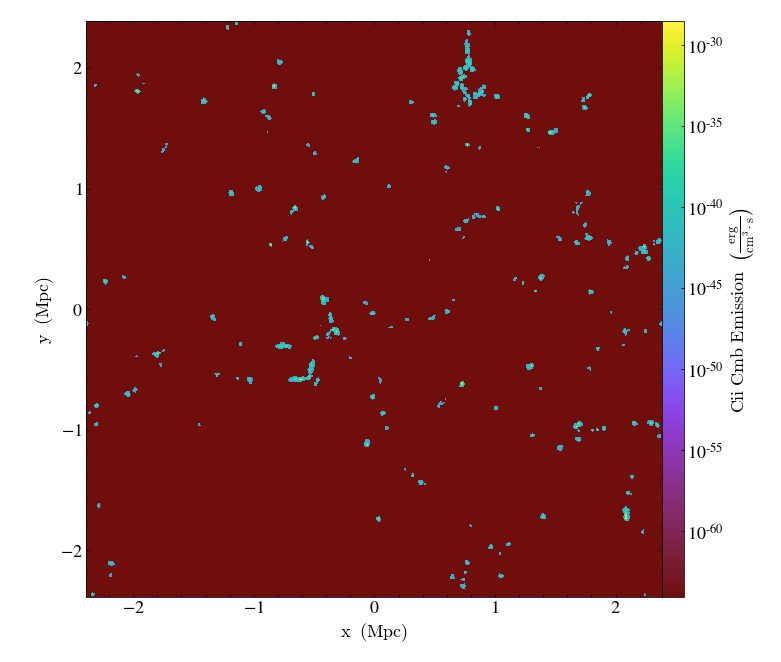

In [2]:
yt.SlicePlot(ds, 'z',('gas','CII_CMB_emission'))

In [2]:
ds.derived_field_list

[('N-BODY', 'MASS'),
 ('N-BODY', 'PID'),
 ('N-BODY', 'POSITION_X'),
 ('N-BODY', 'POSITION_Y'),
 ('N-BODY', 'POSITION_Z'),
 ('N-BODY', 'SPECIES'),
 ('N-BODY', 'TIMESTEP'),
 ('N-BODY', 'VELOCITY_X'),
 ('N-BODY', 'VELOCITY_Y'),
 ('N-BODY', 'VELOCITY_Z'),
 ('N-BODY', 'mesh_id'),
 ('N-BODY', 'particle_angular_momentum'),
 ('N-BODY', 'particle_angular_momentum_magnitude'),
 ('N-BODY', 'particle_angular_momentum_x'),
 ('N-BODY', 'particle_angular_momentum_y'),
 ('N-BODY', 'particle_angular_momentum_z'),
 ('N-BODY', 'particle_cylindrical_velocity_theta'),
 ('N-BODY', 'particle_cylindrical_velocity_z'),
 ('N-BODY', 'particle_index'),
 ('N-BODY', 'particle_mass'),
 ('N-BODY', 'particle_ones'),
 ('N-BODY', 'particle_position'),
 ('N-BODY', 'particle_position_cylindrical_radius'),
 ('N-BODY', 'particle_position_cylindrical_theta'),
 ('N-BODY', 'particle_position_cylindrical_z'),
 ('N-BODY', 'particle_position_relative_x'),
 ('N-BODY', 'particle_position_relative_y'),
 ('N-BODY', 'particle_position

In [3]:
1/yt.units.Zsun

unyt_quantity(1, '1/Zsun')

In [1]:
import yt as yt
ds = yt.load("~/Data/sizmbhloz/sizmbhloz-clref04SNth-rs9_a0.9011.art")

/home/rnoorali/.local/lib/python3.7/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/rnoorali/.config/yt/ytrc is deprecated in favor of /home/rnoorali/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg
yt : [INFO     ] 2022-05-31 18:52:34,989 Parameters: current_time              = 12042349585.44105 yr
yt : [INFO     ] 2022-05-31 18:52:34,995 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-05-31 18:52:34,997 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-31 18:52:34,998 Parameters: domain_right_edge         = [128. 128. 128.]
yt : [INFO     ] 2022-05-31 18:52:35,000 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2022-05-31 18:52:35,003 Parameters: current_redshift          = 0.10980115776994159
yt : [INFO     ] 2

In [6]:
min(sphere['data_object']['gas','rCIIa'])

unyt_quantity(2.41428343e-33, 'cm**3*erg/s')

In [7]:
# from derived_field_CII import * # Contains yt and numpy
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

In [2]:
c = [0.5, 0.5, 0.5]
sphere = ds.sphere(c, (1.0, "kpc"))

In [9]:
def make_sphere_region(row_of_table,zoom_factor = 1.0):
    """
    Takes a specified row in DM halo catalog and makes a spherical region file 
    around it. Auto converts from comoving coordinates. 

    **Parameters**

    :row_of_table: astropy.Table Table

         Astropy table containing at least the coordinates and the virial radius
         of the DM halo. 

    :zoom_factor: float, optional
    
         Used to create a region file zoomed in on the origin. The larger the
         factor, the more zoomed in the region. Defaults to creating a region
         twice the radius of the virial radius


    """
    a = 1/(1+ds.current_redshift)
    h = ds.hubble_constant
    x = row_of_table['X']*a/h
    y = row_of_table['Y']*a/h
    z = row_of_table['Z']*a/h
    r = row_of_table['Rvir']*a/h
    print(a,h,x,y,z,r,2*r/zoom_factor)
    center_vector = yt.YTArray([x, y, z],units="Mpc")
    sphere = ds.sphere(center_vector,(2*r/zoom_factor, "kpc"))
    return {'data_object':sphere,'width':2*sphere.radius}

halo_table = Table.read('/home/rnoorali/Data/halo_catalogs/out_14.list',format = "ascii.commented_header")

halo_table.add_index('Mvir')

largest_mass = halo_table[halo_table.loc_indices[np.amax(halo_table['Mvir'])]]

sphere = make_sphere_region(largest_mass,zoom_factor=14.0)


0.9010623146306872 0.7 0.26326466369752594 23.126459410210735 4.978678223985278 252.62955392112775 36.08993627444682


In [40]:
data = sphere['data_object']
#0.124-0.018*np.log(data['temperature'].to_ndarray()/(100))

In [12]:
unyt_array(pow(data['temperature'].to_ndarray()/(100),0.124-0.018*np.log(data['temperature'].to_ndarray()/(100))))

unyt_array([0.5031902 , 0.50760084, 0.76501426, ..., 0.7675398 ,
            1.20962273, 1.22854937], '(dimensionless)')

In [4]:
min(sphere['data_object']['gas','temperature'])

unyt_quantity(2.99994809, 'K')

In [10]:
np.shape(sphere['data_object']['gas','temperature'])

(17705,)

In [13]:
np.shape(np.zeros(5))

(5,)

(array([1.3614e+04, 2.3790e+03, 1.0850e+03, 4.0000e+02, 1.5400e+02,
        4.3000e+01, 1.4000e+01, 7.0000e+00, 4.0000e+00, 5.0000e+00]),
 unyt_array([2.99994809e+00, 2.39189990e+06, 4.78379681e+06,
             7.17569371e+06, 9.56759062e+06, 1.19594875e+07,
             1.43513844e+07, 1.67432813e+07, 1.91351782e+07,
             2.15270751e+07, 2.39189720e+07], '(dimensionless)'),
 <a list of 10 Patch objects>)

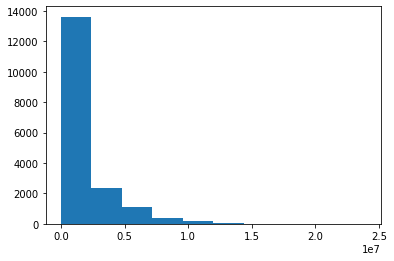

In [8]:
plt.hist(sphere['data_object']['gas','temperature']/Kelvin)

In [41]:
average_value_weighted = data.quantities.weighted_average_quantity(('gas','LCII_total'),('gas','cell_volume'))
average_value_unweighted = data.mean(('gas','cell_volume'))
print(average_value_weighted)

yt : [INFO     ] 2022-06-17 16:34:33,440 Created 27 chunks for ARTIO
/home/rnoorali/.local/lib/python3.7/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'cell_volume' is ambiguous and corresponds to any one of the following field types:
 {'gas', 'artio'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("gas", "cell_volume")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)


6.171965717096848e+36 erg/(cm**3*s)


In [42]:
total_volume = data.quantities.total_quantity(('gas','cell_volume'))

In [47]:
print(np.log10(total_volume*average_value_weighted))

107.82800190527692


In [28]:
print(total_volume.to('kpc**3'))

3711306.0088898824 kpc**3


In [22]:
print(average_value)

1.7015771307628278e+40 erg/(cm**3*s)


In [15]:
def young_stars(pfilter, data):
    age = data.ds.current_time - data[pfilter.filtered_type, "creation_time"]
    filter = np.logical_and(age.in_units("Myr") <= 20, age >= 0)
    return filter


yt.add_particle_filter(
    "young_stars",
    function=young_stars,
    filtered_type="STAR",
    requires=["creation_time"],
)

yt : [WARNING  ] 2022-06-17 16:17:18,877 The young_stars particle filter already exists. Overriding.


In [28]:
ds.add_particle_filter("young_stars")

True

In [4]:
total_young_star_mass = data.quantities.total_quantity(('STAR','particle_mass'))

NameError: name 'data' is not defined

In [31]:
print(np.log(total_young_star_mass.to('Msun')/20/10**6))

5.070437327488181


In [3]:
halo_table

ID,DescID,Mvir,Vmax,Vrms,Rvir,Rs,Np,X,Y,Z,VX,VY,VZ,JX,JY,JZ,Spin,rs_klypin,Mvir_all,M200b,M200c,M500c,M2500c,Xoff,Voff,spin_bullock,b_to_a,c_to_a,A[x],A[y],A[z],b_to_a(500c),c_to_a(500c),A[x](500c),A[y](500c),A[z](500c),T/|U|,M_pe_Behroozi,M_pe_Diemer,LCII_total_ave,sphere_vol,SFR
int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str11,float64,float64,float64
0,-1,46529000.0,13.65,14.8,9.036,0.98,36,2.27431,8.69255,7.96673,104.15,-192.71,-296.32,-64270.0,65140.0,-28860.0,0.0232,0.98027,71908000.0,46529000.0,46529000.0,42299000.0,0.0,0.07516,0.0,0.08398,0.20813,0.00603,1.53055,-0.05641,1.89212,0.55545,0.3625,1.32229,1.50685,3.34116,1.0536,49840000.0,1.692e+07,3.360636029401615e+32,1.0637011922320138e+67,0.0013867558586505742
1,-1,8459800.0,8.53,0.0,5.119,0.365,62,2.1623,8.61589,7.88761,-36.18,4.2,-69.45,0.0,0.0,0.0,0.0,0.36526,8459800.0,8459800.0,8459800.0,8459800.0,0.0,2.55243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11710000.0,0.000e+00,1.2851151999278004e+30,1.9339550150675915e+66,0.009143969028286398
2,-1,54989000.0,13.85,16.24,9.554,1.266,30,2.27112,8.75167,7.93468,-66.93,-182.86,-328.47,-120600.0,-71260.0,25680.0,0.03226,1.26599,84598000.0,54989000.0,54989000.0,46529000.0,0.0,0.4289,3.12,0.09438,0.75143,0.44634,2.39196,0.9439,1.54553,0.30868,0.21673,2.92322,1.11166,0.40858,1.076,56130000.0,2.538e+07,3.576157093337877e+28,1.2573225078563994e+67,0.004097331548768817
3,-1,29609000.0,10.54,18.42,7.773,1.539,65,2.20326,8.75154,8.00095,-76.47,-165.91,-190.54,53560.0,120600.0,25130.0,0.34295,1.53871,46529000.0,29609000.0,29609000.0,8459800.0,0.0,0.58247,4.33,0.24968,0.43262,0.00366,0.59232,1.42883,2.29422,0.0,0.0,0.0,0.0,0.0,2.6162,27170000.0,1.692e+07,1.2757543297077483e+34,6.771064991939606e+66,0.003335399048013826
4,-1,1907700000.0,76.05,73.2,31.16,2.119,829,2.21528,8.67178,7.95704,-122.53,-14.72,-346.48,12730000.0,-24010000.0,-3285000.0,0.02328,0.6236,2466000000.0,1861200000.0,1856900000.0,1527000000.0,1019400000.0,2.94621,6.44,0.04914,0.8245,0.74821,0.18057,0.11206,0.7072,0.86271,0.80437,-0.0098,0.1049,0.61634,0.9383,2719000000.0,8.629e+08,6.5723741395227865e+37,4.361976547885978e+68,22.142389590239176
5,-1,164970000.0,64.08,43.77,13.779,0.048,77,2.21895,8.67333,7.96648,-194.63,-83.4,-370.02,3796.0,173600.0,-321900.0,0.10105,0.04804,224190000.0,160740000.0,160740000.0,152280000.0,135360000.0,0.63581,4.28,0.03883,0.77535,0.60374,0.21818,-0.06164,0.13082,0.76118,0.58804,0.23931,-0.02936,0.04927,0.4739,1375000000.0,1.142e+08,2.3529022587332092e+36,3.771760253854524e+67,2.7182345426720333
6,-1,351080000.0,56.29,52.53,17.724,0.168,224,2.20116,8.67848,7.96451,-17.96,-240.05,-73.22,-732500.0,-281100.0,883700.0,0.02972,0.16812,676790000.0,351080000.0,351080000.0,317240000.0,258020000.0,1.28542,8.9,0.03563,0.72401,0.5141,0.11063,0.54588,0.26258,0.76953,0.54667,0.13411,0.46268,0.19368,0.8871,1224000000.0,1.777e+08,3.562262845086503e+38,8.027424014634426e+67,19.97881644378101
7,-1,40484000000.0,131.72,164.12,86.269,25.909,12194,2.20825,8.70817,7.96008,-51.99,-136.27,-204.36,2298000000.0,899500000.0,-1192000000.0,0.01311,8.89206,50987000000.0,38632000000.0,38463000000.0,24115000000.0,10757000000.0,4.58178,29.47,0.03025,0.63693,0.5057,0.45099,2.00834,0.33227,0.74284,0.61217,0.22368,1.41042,0.3724,1.0882,33860000000.0,4.746e+10,1.0920801641372783e+38,9.256680432938045e+69,112.5912361797405
8,-1,29609000.0,11.13,10.84,7.773,1.101,37,2.31136,8.63838,7.98039,-6.03,-8.7,26.06,-15.21,-22550.0,-80810.0,0.04952,1.10095,50759000.0,29609000.0,29609000.0,4229900.0,0.0,2.3685,0.0,0.15596,0.23596,0.05476,3.75721,1.37276,0.60379,0.0,0.0,0.0,0.0,0.0,1.1081,33930000.0,8.460e+06,4.597139984502428e+34,6.771064991939606e+66,0.005607948997555477


In [2]:
for table_col in col_list:
    halo_table[table_col] = np.NaN
for row in halo_table['ID']:
    row = int(row)
    sphere = make_sphere_region(halo_table[row])
    data = sphere['data_object']
    radius = sphere['width'].to('cm')/2
    
    halo_table['LCII_total_ave'][row] = data.quantities.weighted_average_quantity(('gas','LCII_total'),('gas','cell_volume'))
    halo_table['sphere_vol'][row] = 4.0/3.0 * np.pi * radius**3
    total_young_star_mass = data.quantities.total_quantity(('STAR','particle_mass'))
    halo_table['SFR'][row] = total_young_star_mass.to('Msun')/20/10**6
    
    if row >100:
        break
halo_table.write('/home/rnoorali/Data/rnoorali_turbo/LCII_total_all_halos_test.txt',format='ascii')


/home/rnoorali/.local/lib/python3.7/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'cell_volume' is ambiguous and corresponds to any one of the following field types:
 {'gas', 'artio'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("gas", "cell_volume")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
yt : [INFO     ] 2022-06-20 17:27:11,144 Created 2 chunks for ARTIO
yt : [INFO     ] 2022-06-20 17:27:11,356 Created 4 chunks for ARTIO
yt : [INFO     ] 2022-06-20 17:27:11,655 Created 2 chunks for ARTIO
yt : [INFO     ] 2022-06-20 17:27:11,797 Created 3 chunks for ARTIO
yt : [INFO     ] 2022-06-20 17:27:12,077 Created 12 chunks for ARTIO
yt : [INFO     ] 2022-06-20 17:27:12,947 Created 2 chunks for ARTIO
yt : [INFO     ] 2022-06-20 17:27:13,664 Created 4 chunks for ARTIO
yt : [INFO     ] 2022-06-20 17:27:14,180 Created 2 chunks for

In [51]:
print(col_list)

['LCII_total_ave', 'sphere_vol', 'SFR']


In [2]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
halo_table.sort(['Mvir'])

In [2]:
for table_col in col_list:
    halo_table[table_col] = -0.0123
halo_table.sort(['Mvir'],reverse=True)

c = Table.Column(name='Tracker', data=np.linspace(0,len(halo_table['ID']),len(halo_table['ID']),dtype=np.int32))
halo_table.add_column(c)
for row in halo_table['Tracker']:
    sphere = make_sphere_region(halo_table[row])
    data = sphere['data_object']
#     radius = sphere['width'].to('cm')/2
    
    halo_table['LCII_total_ave'][row] = float(data.quantities.weighted_average_quantity(('gas','LCII_total'),('gas','cell_volume')))
    halo_table['sphere_vol'][row] = data.quantities.total_quantity(('gas','cell_volume'))
    total_young_star_mass = data.quantities.total_quantity(('STAR','particle_mass'))
    halo_table['SFR'][row] = total_young_star_mass.to('Msun')/20./10.**6
#     print(row)
    del sphere,data
    if row>65:
        break
halo_table.remove_column('Tracker')
print_table = halo_table[halo_table['LCII_total_ave'] !=-0.0123]

halo_table.write('/home/rnoorali/Data/rnoorali_turbo/LCII_total_all_halos_100_most_massive.txt',format='ascii',overwrite=True)


yt : [INFO     ] 2022-06-21 11:52:45,719 Created 27 chunks for ARTIO
/home/rnoorali/.local/lib/python3.7/site-packages/yt/data_objects/data_containers.py:1421: VisibleDeprecationWarning: The requested field name 'cell_volume' is ambiguous and corresponds to any one of the following field types:
 {'gas', 'artio'}
Please specify the requested field as an explicit tuple (ftype, fname).
Defaulting to '("gas", "cell_volume")'.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  finfo = self.ds._get_field_info(field)
yt : [INFO     ] 2022-06-21 11:52:48,366 Created 26 chunks for ARTIO
yt : [INFO     ] 2022-06-21 11:52:51,575 Created 31 chunks for ARTIO
yt : [INFO     ] 2022-06-21 11:52:54,135 Created 27 chunks for ARTIO
yt : [INFO     ] 2022-06-21 11:52:56,248 Created 25 chunks for ARTIO
yt : [INFO     ] 2022-06-21 11:52:58,876 Created 15 chunks for ARTIO
yt : [INFO     ] 2022-06-21 11:53:00,917 Created 16 chunks for ARTIO
yt : [INFO     ] 2022-06-21 11:53:02,261 Created 13 chu

In [8]:
np.arange(0,101)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [9]:
np.linspace(0,100,101)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [2]:
halo_table.sort(['Mvir'],reverse=True)

In [3]:
c = Table.Column(name='Tracker', data=np.linspace(0,len(halo_table['ID']),len(halo_table['ID']),dtype=np.int32))

In [5]:
halo_table.add_column(c)

In [3]:
halo_table

ID,DescID,Mvir,Vmax,Vrms,Rvir,Rs,Np,X,Y,Z,VX,VY,VZ,JX,JY,JZ,Spin,rs_klypin,Mvir_all,M200b,M200c,M500c,M2500c,Xoff,Voff,spin_bullock,b_to_a,c_to_a,A[x],A[y],A[z],b_to_a(500c),c_to_a(500c),A[x](500c),A[y](500c),A[z](500c),T/|U|,M_pe_Behroozi,M_pe_Diemer,LCII_total_ave,sphere_vol,SFR
int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str11,float64,float64,float64
86397,-1,476660000000.0,309.53,407.48,196.258,17.899,52935,0.20452,17.96604,3.86774,-62.67,77.79,-100.39,157400000000.0,29410000000.0,34860000000.0,0.00543,17.53304,483690000000.0,466230000000.0,465340000000.0,377320000000.0,225960000000.0,28.14372,52.72,0.02967,0.76548,0.65653,2.14556,-0.14931,3.2618,0.81159,0.66853,2.01311,0.20194,2.71416,1.0125,448300000000.0,2.496e+11,6.171965717096848e+36,1.0903813137151106e+71,159.24395387574552
86466,-1,413810000000.0,287.75,392.85,187.223,20.37,67512,0.06747,18.3704,3.95091,-66.74,-92.74,-93.03,145600000000.0,-173300000000.0,140300000000.0,0.01438,18.73066,426810000000.0,407270000000.0,406660000000.0,341750000000.0,183780000000.0,26.09883,56.36,0.06104,0.82136,0.76777,-0.28459,2.37868,2.3903,0.8386,0.76742,0.22411,2.02835,2.19932,1.0208,405300000000.0,2.534e+11,3.15651021604107e+37,9.440073085409039e+70,167.3488774321094
38,-1,318980000000.0,252.81,319.93,171.664,30.434,47327,2.16914,8.66555,7.89305,20.69,11.0,39.86,-3271000000.0,35360000000.0,-9558000000.0,0.00519,21.01484,327590000000.0,309760000000.0,308960000000.0,230840000000.0,103250000000.0,22.00869,34.1,0.01301,0.58823,0.46923,1.93848,1.27907,2.69123,0.57008,0.47832,1.50161,1.07146,2.29266,0.9317,265000000000.0,2.508e+11,1.3731003268715066e+37,7.298049745260767e+70,116.28279939661923
43859,-1,290920000000.0,257.33,317.81,166.475,17.141,53636,8.60469,9.64793,10.23855,8.23,-10.88,26.37,59240000000.0,-25530000000.0,71380000000.0,0.02332,16.23433,300240000000.0,284000000000.0,283300000000.0,208870000000.0,129990000000.0,7.20926,15.93,0.03968,0.83665,0.79661,-0.42232,3.1904,0.22328,0.95061,0.92006,0.0281,2.51808,-0.21546,0.8669,258500000000.0,1.590e+11,1.067128052720533e+37,6.656967557426888e+70,94.00799337920795
86778,-1,227340000000.0,214.3,278.21,153.338,25.7,37957,19.07061,18.68755,3.91994,55.28,-117.29,-82.29,-21100000000.0,-18030000000.0,-61300000000.0,0.0207,24.97251,228610000000.0,221910000000.0,221330000000.0,164040000000.0,79269000000.0,10.24096,18.41,0.04186,0.96248,0.69411,2.72842,0.00711,0.86136,0.91655,0.69424,0.12747,1.91425,1.37181,0.8927,191800000000.0,1.724e+11,1.0422805428939792e+37,5.1826723556886307e+70,106.22502917298631
43749,-1,181480000000.0,183.86,291.92,142.243,137.807,12121,7.28015,5.16177,17.09177,-5.33,-61.58,-14.44,143800000000.0,-37030000000.0,-86400000000.0,0.17129,44.70562,185780000000.0,175320000000.0,174610000000.0,92927000000.0,359540000.0,61.20296,73.59,0.15563,0.01162,0.00926,17.17302,-5.55669,32.63393,0.00225,0.00098,16.08246,-5.18712,30.44652,1.7849,147700000000.0,2.311e+11,1.319390941376517e+37,4.135953140041832e+70,77.10827429264435
746,-1,139910000000.0,195.58,236.68,130.43,17.19,30849,5.26918,8.51709,2.28499,-84.62,-43.45,-48.8,40150000000.0,-23230000000.0,-13540000000.0,0.04185,14.62497,142120000000.0,135050000000.0,134600000000.0,94860000000.0,54511000000.0,6.77322,16.96,0.06751,0.82926,0.72264,0.67007,-0.00685,2.34637,0.83011,0.73351,0.81488,0.26882,1.77746,0.8407,114000000000.0,8.300e+10,4.2616305202669034e+35,3.1868310707720126e+70,59.56016501491819
123491,-1,136710000000.0,178.96,251.71,129.427,33.314,8051,13.30942,13.15201,11.63393,-59.9,-95.31,-23.39,9054000.0,10790000000.0,-10180000000.0,0.01396,22.52374,137490000000.0,134590000000.0,134410000000.0,102700000000.0,862900000.0,23.99059,66.65,0.02154,0.21928,0.16043,-0.0714,5.00465,9.03869,0.03151,0.02599,0.12368,9.62755,16.92

In [4]:
halo_table.remove_column('Tracker')

In [4]:
massive_halos = halo_table[halo_table['SFR']!=-0.0123]

In [5]:
massive_halos

ID,DescID,Mvir,Vmax,Vrms,Rvir,Rs,Np,X,Y,Z,VX,VY,VZ,JX,JY,JZ,Spin,rs_klypin,Mvir_all,M200b,M200c,M500c,M2500c,Xoff,Voff,spin_bullock,b_to_a,c_to_a,A[x],A[y],A[z],b_to_a(500c),c_to_a(500c),A[x](500c),A[y](500c),A[z](500c),T/|U|,M_pe_Behroozi,M_pe_Diemer,LCII_total_ave,sphere_vol,SFR
int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str11,float64,float64,float64
86397,-1,476660000000.0,309.53,407.48,196.258,17.899,52935,0.20452,17.96604,3.86774,-62.67,77.79,-100.39,157400000000.0,29410000000.0,34860000000.0,0.00543,17.53304,483690000000.0,466230000000.0,465340000000.0,377320000000.0,225960000000.0,28.14372,52.72,0.02967,0.76548,0.65653,2.14556,-0.14931,3.2618,0.81159,0.66853,2.01311,0.20194,2.71416,1.0125,448300000000.0,2.496e+11,6.171965717096848e+36,1.0903813137151106e+71,159.24395387574552
86466,-1,413810000000.0,287.75,392.85,187.223,20.37,67512,0.06747,18.3704,3.95091,-66.74,-92.74,-93.03,145600000000.0,-173300000000.0,140300000000.0,0.01438,18.73066,426810000000.0,407270000000.0,406660000000.0,341750000000.0,183780000000.0,26.09883,56.36,0.06104,0.82136,0.76777,-0.28459,2.37868,2.3903,0.8386,0.76742,0.22411,2.02835,2.19932,1.0208,405300000000.0,2.534e+11,3.15651021604107e+37,9.440073085409039e+70,167.3488774321094
38,-1,318980000000.0,252.81,319.93,171.664,30.434,47327,2.16914,8.66555,7.89305,20.69,11.0,39.86,-3271000000.0,35360000000.0,-9558000000.0,0.00519,21.01484,327590000000.0,309760000000.0,308960000000.0,230840000000.0,103250000000.0,22.00869,34.1,0.01301,0.58823,0.46923,1.93848,1.27907,2.69123,0.57008,0.47832,1.50161,1.07146,2.29266,0.9317,265000000000.0,2.508e+11,1.3731003268715066e+37,7.298049745260767e+70,116.28279939661923
43859,-1,290920000000.0,257.33,317.81,166.475,17.141,53636,8.60469,9.64793,10.23855,8.23,-10.88,26.37,59240000000.0,-25530000000.0,71380000000.0,0.02332,16.23433,300240000000.0,284000000000.0,283300000000.0,208870000000.0,129990000000.0,7.20926,15.93,0.03968,0.83665,0.79661,-0.42232,3.1904,0.22328,0.95061,0.92006,0.0281,2.51808,-0.21546,0.8669,258500000000.0,1.590e+11,1.067128052720533e+37,6.656967557426888e+70,94.00799337920795
86778,-1,227340000000.0,214.3,278.21,153.338,25.7,37957,19.07061,18.68755,3.91994,55.28,-117.29,-82.29,-21100000000.0,-18030000000.0,-61300000000.0,0.0207,24.97251,228610000000.0,221910000000.0,221330000000.0,164040000000.0,79269000000.0,10.24096,18.41,0.04186,0.96248,0.69411,2.72842,0.00711,0.86136,0.91655,0.69424,0.12747,1.91425,1.37181,0.8927,191800000000.0,1.724e+11,1.0422805428939792e+37,5.1826723556886307e+70,106.22502917298631
43749,-1,181480000000.0,183.86,291.92,142.243,137.807,12121,7.28015,5.16177,17.09177,-5.33,-61.58,-14.44,143800000000.0,-37030000000.0,-86400000000.0,0.17129,44.70562,185780000000.0,175320000000.0,174610000000.0,92927000000.0,359540000.0,61.20296,73.59,0.15563,0.01162,0.00926,17.17302,-5.55669,32.63393,0.00225,0.00098,16.08246,-5.18712,30.44652,1.7849,147700000000.0,2.311e+11,1.319390941376517e+37,4.135953140041832e+70,77.10827429264435
746,-1,139910000000.0,195.58,236.68,130.43,17.19,30849,5.26918,8.51709,2.28499,-84.62,-43.45,-48.8,40150000000.0,-23230000000.0,-13540000000.0,0.04185,14.62497,142120000000.0,135050000000.0,134600000000.0,94860000000.0,54511000000.0,6.77322,16.96,0.06751,0.82926,0.72264,0.67007,-0.00685,2.34637,0.83011,0.73351,0.81488,0.26882,1.77746,0.8407,114000000000.0,8.300e+10,4.2616305202669034e+35,3.1868310707720126e+70,59.56016501491819
123491,-1,136710000000.0,178.96,251.71,129.427,33.314,8051,13.30942,13.15201,11.63393,-59.9,-95.31,-23.39,9054000.0,10790000000.0,-10180000000.0,0.01396,22.52374,137490000000.0,134590000000.0,134410000000.0,102700000000.0,862900000.0,23.99059,66.65,0.02154,0.21928,0.16043,-0.0714,5.00465,9.03869,0.03151,0.02599,0.12368,9.62755,16.92

Text(0, 0.5, 'log(SFR) ($M_\\odot$/yr)')

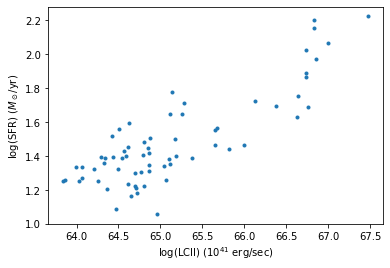

In [8]:
plt.plot(np.log10(massive_halos['LCII_total_ave']*massive_halos['sphere_vol'])-41.,np.log10(massive_halos['SFR']),'.')
plt.xlabel(r'log(LCII) ($10^{41}$ erg/sec)')
plt.ylabel(r'log(SFR) ($M_\odot$/yr)')